In [1]:
import sys
import stmpy
import numpy as np
import cancelv3 as cancel
from decimal import *
import pathlib
from sklearn.externals import joblib

import datetime
import scipy.fftpack as fftp
import os

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
def create_drive(zdata, dt2, tf, freqs):
    fbottom2 = np.fft.fft(zdata)
    freq2 = np.fft.fftfreq(len(zdata),dt2)
    freq2[freq2 > freqs[np.argmax(freqs)]] = freqs[np.argmax(freqs)]
    freq2[freq2 < freqs[np.argmin(freqs)]] = freqs[np.argmin(freqs)]
    driver = np.fft.ifft(tf(freq2)*fbottom2)
    return driver

def fit_cancel(array, n=1):
    t=linspace(0,len(array),len(array))
    fit = polyfit(t,array,n)
    corrective = fit[n]*ones(shape(t))
    for j in arange(n):
        corrective += fit[j]*(t**(n-j))
    return array - corrective

folder_name = '../STMDATA/2019-01-28/'
# [transf,freqs]=joblib.load('../STMDATA/2019-01-26/transfer-fxn4')
# [transf,freqs]=joblib.load('../STMDATA/2019-01-28/trx-chopped3') 
[transf,freqs]=joblib.load(folder_name+'trx_2')    

In [70]:
i=1
loc='../STMDATA/2019-01-28/trx_2 ('
dat=load(loc+str(i)+').npy')
# nc = cancel.Cancel(dat[:,1]-mean(dat[:,1]),fit_cancel(dat[:,2]),1/10000,p=[200000,50000,5])

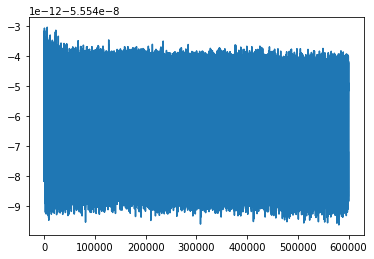

In [78]:
plot(dat[:,2])

In [ ]:
for i in arange(2,355):
    print(i)
    dat=load(loc+str(i)+').npy')
    nc.update_transf(dat[:,1]-mean(dat[:,1]),fit_cancel(dat[:,2]),1/10000,p=[200000,50000,5])
#     nc.update_transf(dat[:,1],dat[:,2],1/10000,[200000,50000,5])

In [ ]:
i=1
loc='../STMDATA/2019-01-28/trxn ('
dat=load(loc+str(i)+').npy')
nc = cancel.Cancel(dat[:,0]-mean(dat[:,0]),fit_cancel(dat[:,1]),1/10000,p=[200000,50000,5])

In [ ]:
for i in arange(2,390):
    print(i)
    dat=load(loc+str(i)+').npy')
    nc.update_transf(dat[:,0]-mean(dat[:,0]),fit_cancel(dat[:,1]),1/10000,p=[200000,50000,5])
#     nc.update_transf(dat[:,1],dat[:,2],1/10000,[200000,50000,5])

In [ ]:
loglog(nc.freqs,abs(nc.transf(nc.freqs)))
xlim(0,300)

In [ ]:
plot(nc.freqs,angle(nc.transf(nc.freqs)))
xlim(1,300)

In [ ]:
plot((dat[:,1]-mean(dat[:,1]))*1e12)
plot((dat[:,1]-nc.create_drive(dat[:,0]-mean(dat[:,0]))-mean(dat[:,1]))*1e12)

In [ ]:
joblib.dump([nc.transf,nc.freqs],'../STMDATA/2019-01-28/trxn')

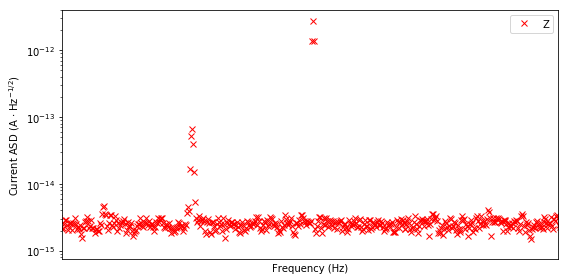

In [82]:
from scipy import signal

end=300000

trace.i = dat[:end,2]
trace.t = arange(200000)/10000

trace.w = stmpy.tools.fftfreq(len(trace.i), trace.t[-1])
trace.w2, trace.psd = signal.welch(trace.i, 10000, nperseg=50000)

figure(figsize=[8,4])
loglog(trace.w2, sqrt(trace.psd), 'r-', lw=1, label='Z')

# trace.i = test[:end,2]-create_drive(test[:end,1]-mean(test[:end,1]),1/10000,transf,freqs)
# trace.t = arange(200000)/10000

# trace.w = stmpy.tools.fftfreq(len(trace.i), trace.t[-1])
# trace.w2, trace.psd = signal.welch(trace.i, 10000, nperseg=50000)

# loglog(trace.w2, sqrt(trace.psd), 'b-', lw=1, label='Geo')
legend()
# xlim(trace.w[0], trace.w[-1])
# xlim(50,70)
xlim(2450,2550)
# ylim(1e-17,1e-12)
xlabel('Frequency (Hz)')
ylabel('Current ASD (A $\cdot$ Hz$^{-1/2}$)')
tight_layout()

In [6]:
test=loadtxt(folder_name+'2019-01-28-13-45-bias-spectroscopy007.dat',skiprows=137)

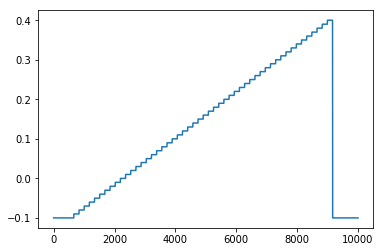

In [7]:
start=7500
end=17500
plot(test[start:end,2])

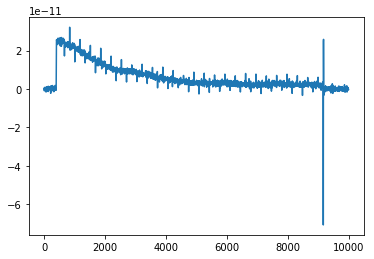

In [8]:
plot(test[start:end,-1])

In [9]:
# log fitting
i=1
z_spec=loadtxt(folder_name+'Z-Spectroscopy-AC00002.dat',skiprows=65)
fit = polyfit(z_spec[:,0],log(abs(z_spec[:,1])),1)

# start=5000
# end=2000000
# t=linspace(0,(start-end)/-10,end-start)

z_noise=create_drive(test[:,1],1/10000,transf,freqs)
cur_noise=exp(-(z_noise-mean(z_noise))*fit[0])

fit

array([-1.50092212e+10, -2.39677072e+01])

In [77]:
# log fitting
i=1
z_spec=loadtxt(folder_name+'Z-Spectroscopy-AC00001.dat',skiprows=65)
fit = polyfit(z_spec[:,0],log(abs(z_spec[:,1])),1)

# start=5000
# end=2000000
# t=linspace(0,(start-end)/-10,end-start)

z_noise=create_drive(test[:,1],1/10000,transf,freqs)
cur_noise=exp(-(z_noise-mean(z_noise))*fit[0])

fit

array([-1.50452523e+10, -2.39652995e+01])

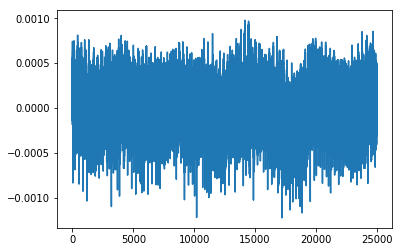

In [20]:
plot(test[:,1]-mean(test[:,1]))

In [34]:
# log fitting
i=1
z_spec=loadtxt(folder_name+'Z-Spectroscopy-AC00003.dat',skiprows=65)
fit = polyfit(z_spec[:,0],log(abs(z_spec[:,1])),1)

# start=5000
# end=2000000
# t=linspace(0,(start-end)/-10,end-start)

z_noise=create_drive(test[:,1]-mean(test[:,1]),1/10000,transf,freqs)
cur_noise=exp(-(z_noise-mean(z_noise))*fit[0])

fit

array([-1.50476017e+10, -2.39644115e+01])

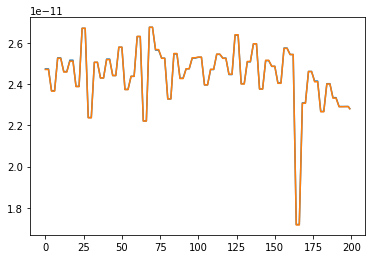

In [42]:
start=8000
end=8200
plot(test[start:end,-1])
plot(test[start:end,-1]/repeat(mean(cur_noise[start:end].reshape(-1,4),axis=1),4))

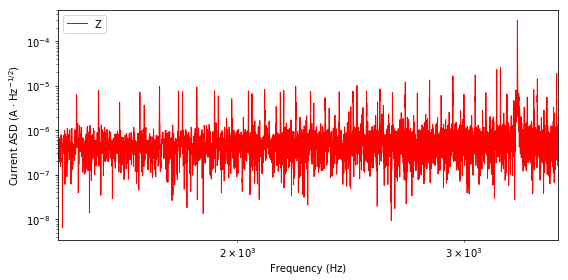

In [66]:
from scipy import signal

end=300000

trace.i = test[:end,1]
# trace.i = z_noise[:end]
trace.t = arange(200000)/10000

trace.w = stmpy.tools.fftfreq(len(trace.i), trace.t[-1])
trace.w2, trace.psd = signal.welch(trace.i, 10000, nperseg=50000)

figure(figsize=[8,4])
loglog(trace.w2, sqrt(trace.psd), 'r-', lw=1, label='Z')
legend()
# grid()
# xlim(trace.w[0], trace.w[-1])
xlim(3450,3550)
# ylim(1e-17,1e-12)
xlabel('Frequency (Hz)')
ylabel('Current ASD (A $\cdot$ Hz$^{-1/2}$)')
tight_layout()

(2495, 2505)

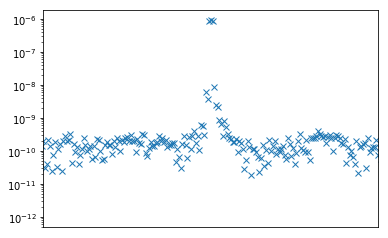

In [85]:
loglog(freqs,abs(transf(freqs)),'x')
xlim(2495,2505)

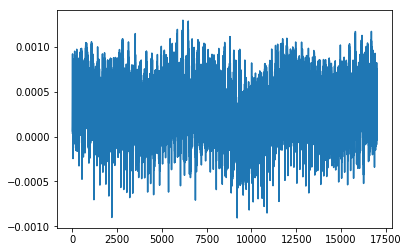

In [63]:
plot(test[start:end,1])

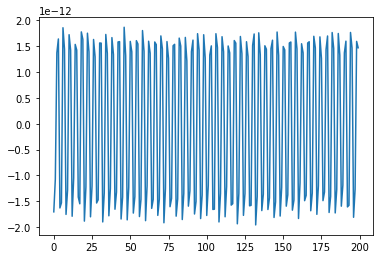

In [43]:
plot(z_noise[start:end])

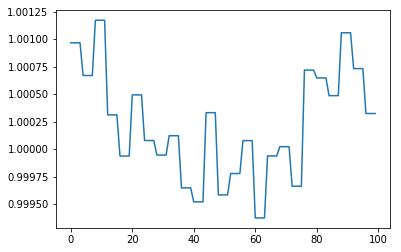

In [44]:
plot(repeat(mean(cur_noise[start:end].reshape(-1,8),axis=1),4))

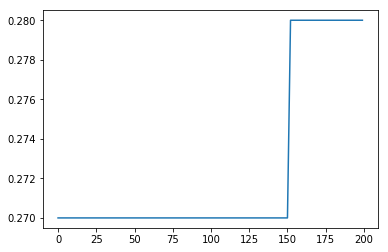

In [102]:
plot(test[start:end,2])

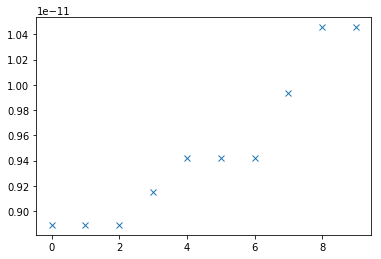

In [88]:
plot(test[:10,-1],'x')